# 1 Data exploration - mapped, cleaned data

## 1.1 Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, count, when, isnan, create_map, lit, udf, month, monotonically_increasing_id, desc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

In [2]:
spark = SparkSession.builder.appName("accidents_exploration").getOrCreate()

In [3]:
cleanData = spark.read.parquet("cleanData").sample(False, 0.2, seed=None)

In [4]:
# convert pyspark dataframe to pandas
pandasData = cleanData.toPandas()

## 1.2 Info, statistics...

In [5]:
# pyspark "shape" alike
print((cleanData.count(), len(cleanData.columns)))

(74654, 39)


In [6]:
#information about number of values, data types, columns...
pandasData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74654 entries, 0 to 74653
Data columns (total 39 columns):
DRUH_POZEMNÍ_KOMUNIKACE                      74654 non-null object
DEN_V_TYDNU                                  74654 non-null object
ČAS                                          74654 non-null object
LABEL                                        74654 non-null int32
USMRCENO_OSOB                                74654 non-null float64
TĚŽCE_ZRANĚNO_OSOB                           74654 non-null float64
LEHCE_ZRANĚNO_OSOB                           74654 non-null float64
CELKOVÁ_HMOTNÁ_ŠKODA                         74654 non-null float64
STAV_POVRCHU_VOZOVKY_V_DOBĚ_NEHODY           74654 non-null object
STAV_KOMUNIKACE                              74654 non-null object
POVĚTRNOSTNÍ_PODMÍNKY_V_DOBĚ_NEHODY          74654 non-null object
VIDITELNOST                                  74654 non-null object
ROZHLEDOVÉ_POMĚRY                            74654 non-null object
DĚLENÍ_KOMUNIKACE

In [7]:
#lets see some data
pandasData.head(10)

,DRUH_POZEMNÍ_KOMUNIKACE,DEN_V_TYDNU,ČAS,LABEL,USMRCENO_OSOB,TĚŽCE_ZRANĚNO_OSOB,LEHCE_ZRANĚNO_OSOB,CELKOVÁ_HMOTNÁ_ŠKODA,STAV_POVRCHU_VOZOVKY_V_DOBĚ_NEHODY,STAV_KOMUNIKACE,POVĚTRNOSTNÍ_PODMÍNKY_V_DOBĚ_NEHODY,VIDITELNOST,ROZHLEDOVÉ_POMĚRY,DĚLENÍ_KOMUNIKACE,SITUOVÁNÍ_NEHODY_NA_KOMUNIKACI,ŘÍZENÍ_PROVOZU_V_DOBĚ_NEHODY,MÍSTNÍ_ÚPRAVA_PŘEDNOSTI_V_JÍZDĚ,SPECIFICKÁ_MÍSTA_A_OBJEKTY_V_MÍSTĚ_NEHODY,SMĚROVÉ_POMĚRY,POČET_ZÚČASTNĚNÝCH_VOZIDEL,MÍSTO_DOPRAVNÍ_NEHODY,DRUH_VOZIDLA,ŠKODA_NA_VOZIDLE,DRUH_NEHODY,DRUH_SRÁŽKY_JEDOUCÍCH_VOZIDEL,DRUH_PEVNÉ_PŘEKÁŽKY,ZAVINĚNÍ_NEHODY,ALKOHOL_U_VINÍKA_NEHODY_PŘÍTOMEN,HLAVNÍ_PŘÍČINY_NEHODY,DRUH_POVRCHU_VOZOVKY,ROK_VÝROBY_VOZIDLA,LOKALITA_NEHODY,CHARAKTERISTIKA_VOZIDLA_,SMYK,KATEGORIE_ŘIDIČE,STAV_ŘIDIČE,VNĚJŠÍ_OVLIVNĚNÍ_ŘIDIČE,OBDOBI,SVATEK
0,komunikace sledovaná (ve vybraných městech),tyden,den,0,0.0,0.0,0.0,1550.0,povrch suchý neznečištěný,"dobrý, bez závad",neztížené,ve dne viditelnost nezhoršená vlivem povětrnos...,dobré,třípruhová,vstup chodce na signál VOLNO,žádný způsob řízení provozu,přednost nevyznačena - vyplývá z pravidel siln...,v blízkosti přechodu pro chodce (do vzdálenost...,přímý úsek,1.0,mimo křižovatku,osobni,1500.0,srážka s pevnou překážkou,nepřichází v úvahu,"zeď, pevná část mostů,",řidičem motorového vozidla,ne,nesprávný způsob jízdy,živice,6.0,v obci,soukrome,ne,s ridicskym opravnenim,dobry,řidič nebyl ovlivněn,leto,Ne
1,komunikace sledovaná (ve vybraných městech),tyden,vecer,1,0.0,1.0,0.0,200.0,povrch suchý neznečištěný,"dobrý, bez závad",neztížené,ve dne viditelnost nezhoršená vlivem povětrnos...,dobré,žádná z uvedených,vstup chodce na signál VOLNO,místní úprava,přednost vyznačena dopravními značkami,žádné nebo žádné z uvedených,křižovatka průsečná - čtyřramenná,1.0,na kžižovatce jedná-li se o křížení místních k...,osobni,200.0,srážka s chodcem,nepřichází v úvahu,nepříchází v úvahu,chodcem,ne,nezaviněná řidičem,živice,6.0,v obci,soukrome,ne,s ridicskym opravnenim,dobry,řidič nebyl ovlivněn,leto,Ne
2,uzel tj. křižovatka sledovaná ve vybraných mě...,tyden,vecer,0,0.0,0.0,0.0,9100.0,povrch suchý neznečištěný,"dobrý, bez závad",neztížené,ve dne viditelnost nezhoršená vlivem povětrnos...,dobré,žádná z uvedených,vstup chodce na signál VOLNO,světelným signalizačním zařízením,žádná místní úprava,v blízkosti přechodu pro chodce (do vzdálenost...,křižovatka pěti a víceramenná,2.0,na křižovatce uvnitř hranic křižovatky definov...,nakladni,4500.0,srážka s jedoucím nekolejovým vozidlem,boční,nepříchází v úvahu,řidičem motorového vozidla,ne,nedání přednosti v jízdě,živice,19.0,v obci,firemni,ne,s ridicskym opravnenim,dobry,řidič nebyl ovlivněn,leto,Ne
3,komunikace místní,tyden,den,0,0.0,0.0,0.0,900.0,povrch suchý neznečištěný,"dobrý, bez závad",neztížené,ve dne viditelnost nezhoršená vlivem povětrnos...,dobré,dvoupruhová,vstup chodce na signál VOLNO,žádný způsob řízení provozu,žádná místní úprava,žádné nebo žádné z uvedených,přímý úsek,2.0,mimo křižovatku,osobni,600.0,srážka s jedoucím nekolejovým vozidlem,zezadu,nepříchází v úvahu,řidičem motorového vozidla,ne,nesprávný způsob jízdy,živice,18.0,v obci,firemni,ne,s ridicskym opravnenim,dobry,řidič nebyl ovlivněn,leto,Ne
4,komunikace sledovaná (ve vybraných městech),tyden,den,0,0.0,0.0,0.0,150.0,povrch suchý neznečištěný,"dobrý, bez závad",neztížené,ve dne viditelnost nezhoršená vlivem povětrnos...,dobré,třípruhová,vstup chodce na signál VOLNO,žádný způsob řízení provozu,žádná místní úprava,žádné nebo žádné z uvedených,přímý úsek,2.0,mimo křižovatku,osobni,50.0,srážka s jedoucím nekolejovým vozidlem,zezadu,nepříchází v úvahu,řidičem motorového vozidla,ne,nesprávný způsob jízdy,živice,7.0,v obci,soukrome,ne,s ridicskym opravnenim,dobry,řidič nebyl ovlivněn,leto,Ne
5,komunikace sledovaná (ve vybraných městech),tyden,den,0,0.0,0.0,0.0,20.0,povrch suchý neznečištěný,"dobrý, bez závad",neztížené,ve dne viditelnost nezhoršená vlivem povětrnos...,dobré,třípruhová,"chůze, stání na chodníku",žádný způsob řízení provozu,přednost nevyznačena - vyplývá z pravide

In [8]:
#lets see some statistics
pandasData.describe()

,LABEL,USMRCENO_OSOB,TĚŽCE_ZRANĚNO_OSOB,LEHCE_ZRANĚNO_OSOB,CELKOVÁ_HMOTNÁ_ŠKODA,POČET_ZÚČASTNĚNÝCH_VOZIDEL,ŠKODA_NA_VOZIDLE,ROK_VÝROBY_VOZIDLA
count,74654.000000,74654.000000,74654.000000,74654.000000,74654.000000,74654.000000,74654.000000,74654.000000
mean,0.226954,0.005613,0.023281,0.261245,765.172851,1.570566,400.501179,16.819112
std,0.418865,0.084785,0.176725,0.607156,2910.414895,0.644421,871.274723,22.640685
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,150.000000,1.000000,50.000000,7.000000
50%,0.000000,0.000000,0.000000,0.000000,400.000000,2.000000,200.000000,12.000000
75%,0.000000,0.000000,0.000000,0.000000,841.000000,2.000000,500.000000,16.000000
max,1.000000,4.000000,14.000000,30.000000,253500.000000,15.000000,80500.000000,99.000000


## Define numerical and categorical features

In [9]:
numericalFeatures = ['USMRCENO_OSOB','TĚŽCE_ZRANĚNO_OSOB','LEHCE_ZRANĚNO_OSOB','CELKOVÁ_HMOTNÁ_ŠKODA',
                     'POČET_ZÚČASTNĚNÝCH_VOZIDEL','ROK_VÝROBY_VOZIDLA','ŠKODA_NA_VOZIDLE']

categoricalFeatures = ['DRUH_POZEMNÍ_KOMUNIKACE','DEN_V_TYDNU','ČAS','DRUH_NEHODY','DRUH_SRÁŽKY_JEDOUCÍCH_VOZIDEL',
                 'DRUH_PEVNÉ_PŘEKÁŽKY','ZAVINĚNÍ_NEHODY','ALKOHOL_U_VINÍKA_NEHODY_PŘÍTOMEN',
                 'HLAVNÍ_PŘÍČINY_NEHODY','DRUH_POVRCHU_VOZOVKY','STAV_POVRCHU_VOZOVKY_V_DOBĚ_NEHODY','STAV_KOMUNIKACE',
                 'POVĚTRNOSTNÍ_PODMÍNKY_V_DOBĚ_NEHODY','VIDITELNOST','ROZHLEDOVÉ_POMĚRY','DĚLENÍ_KOMUNIKACE',
                 'SITUOVÁNÍ_NEHODY_NA_KOMUNIKACI','ŘÍZENÍ_PROVOZU_V_DOBĚ_NEHODY','MÍSTNÍ_ÚPRAVA_PŘEDNOSTI_V_JÍZDĚ',
                 'SPECIFICKÁ_MÍSTA_A_OBJEKTY_V_MÍSTĚ_NEHODY','SMĚROVÉ_POMĚRY','MÍSTO_DOPRAVNÍ_NEHODY','DRUH_VOZIDLA',
                 'CHARAKTERISTIKA_VOZIDLA_','SMYK',
                'KATEGORIE_ŘIDIČE','STAV_ŘIDIČE','VNĚJŠÍ_OVLIVNĚNÍ_ŘIDIČE','LOKALITA_NEHODY', 'OBDOBI']

## 1.3 Histograms

In [10]:
# plot settings
clr = "#c2c1f2"
pltt = "Set2"
sns.set_palette(pltt)
plt.rcParams.update({'figure.max_open_warning': 0})

<Figure size 432x288 with 0 Axes>

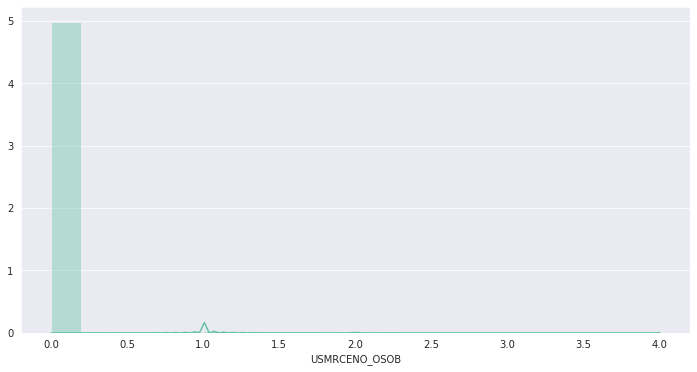

<Figure size 432x288 with 0 Axes>

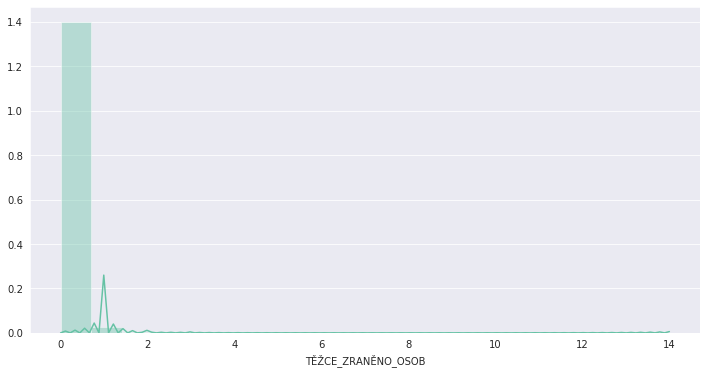

<Figure size 432x288 with 0 Axes>

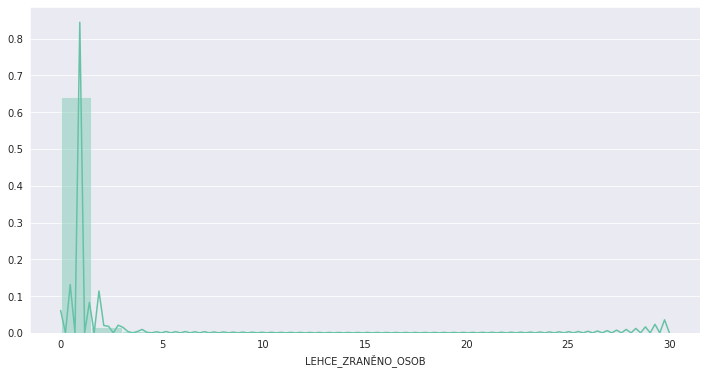

<Figure size 432x288 with 0 Axes>

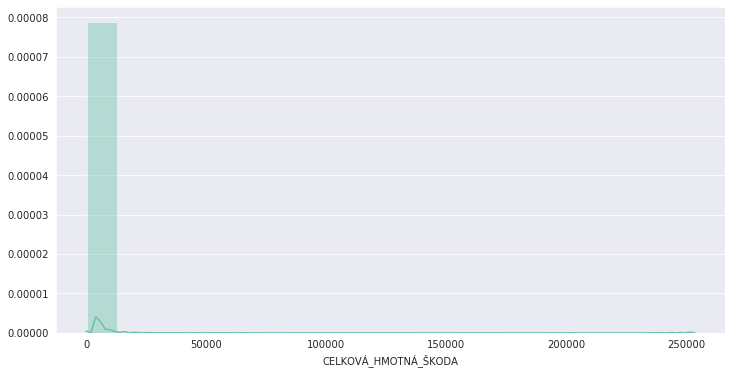

<Figure size 432x288 with 0 Axes>

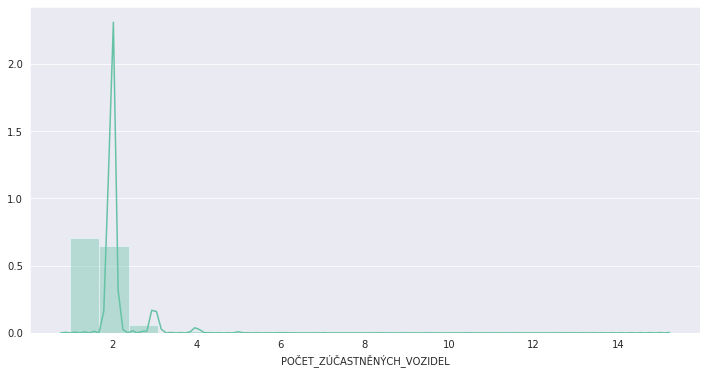

<Figure size 432x288 with 0 Axes>

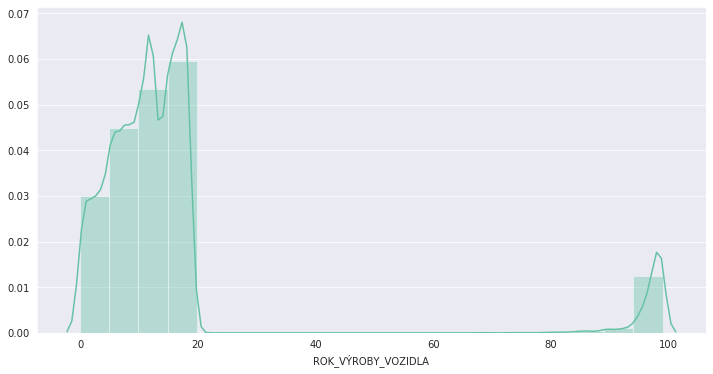

<Figure size 432x288 with 0 Axes>

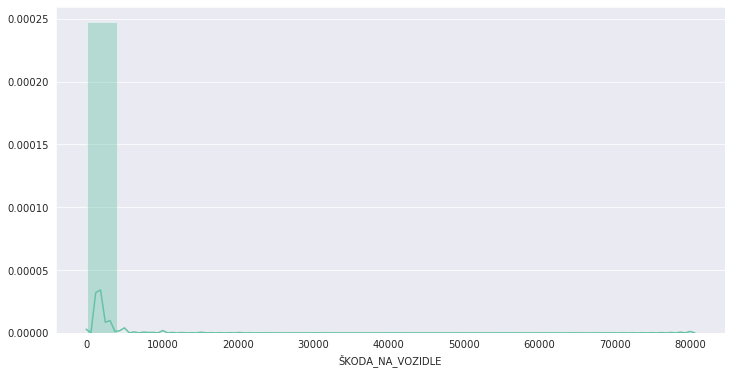

In [11]:
def histogram(x, bins):
  plt.figure()
  sns.set_style("darkgrid")
  f, ax = plt.subplots(figsize=(12, 6))
  sns.distplot(x, bins = bins, kde = True )
  plt.grid(axis = 'x')
  return;

for c in numericalFeatures: 
  histogram(cleanData.toPandas()[c], 20)

## 1.4 Counts for categorical features

In [12]:
# function for bar labeling with actual counts
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height), ha='center', va='bottom',fontsize=fontsize)

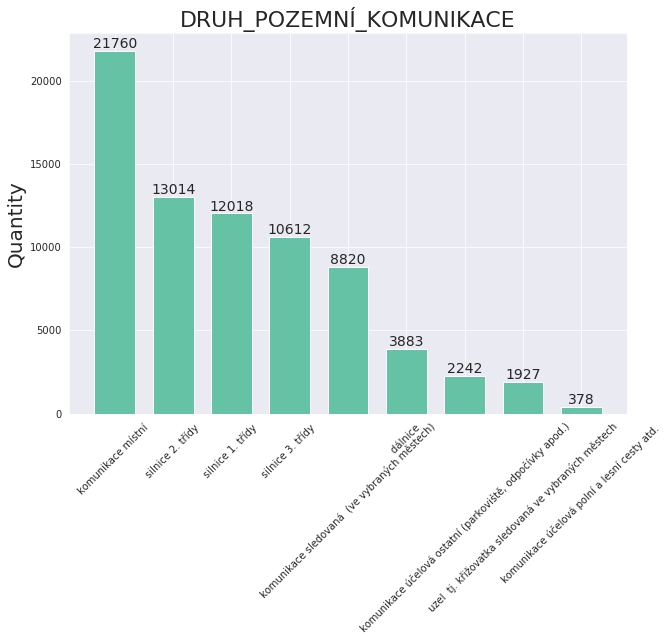

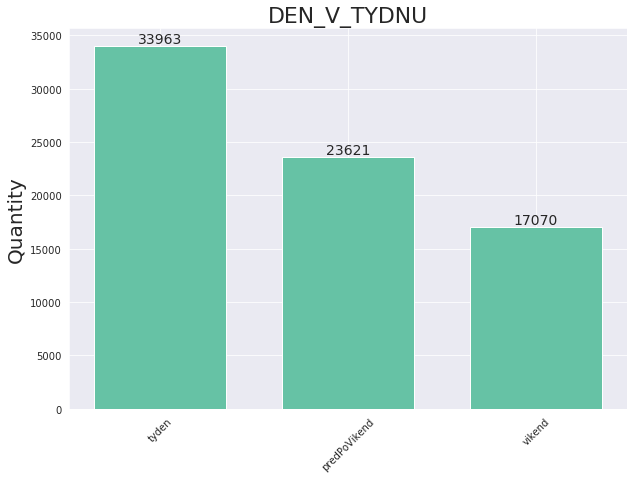

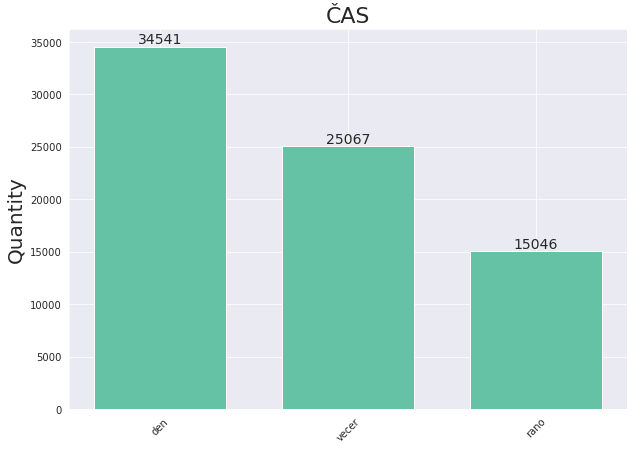

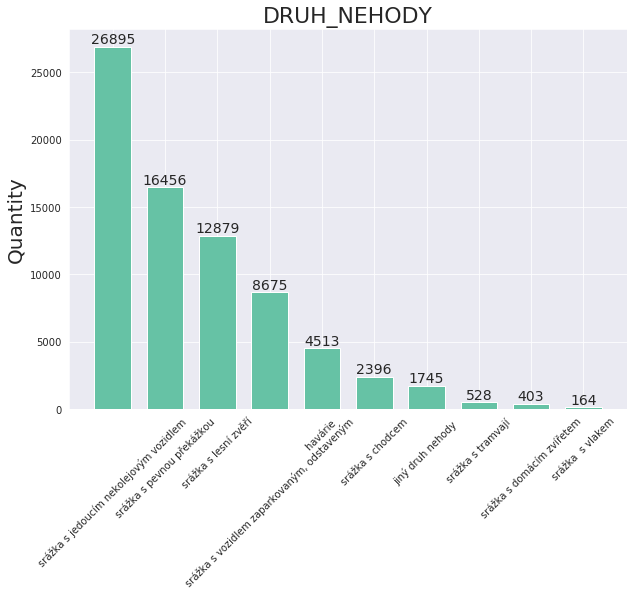

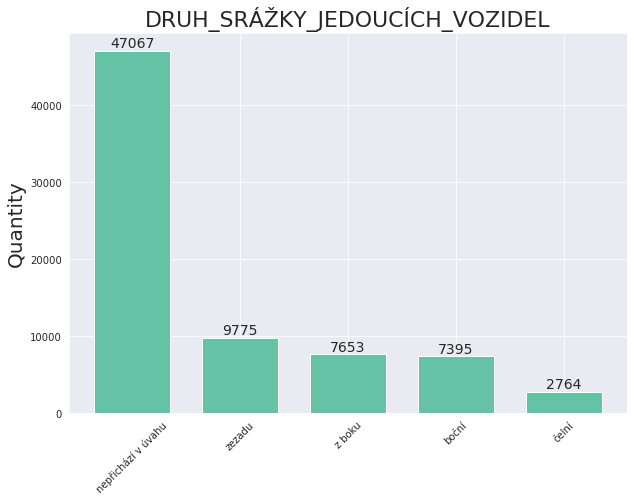

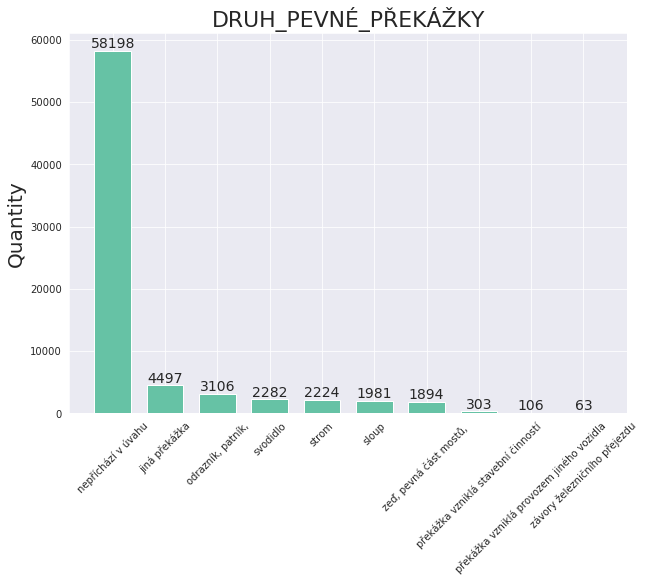

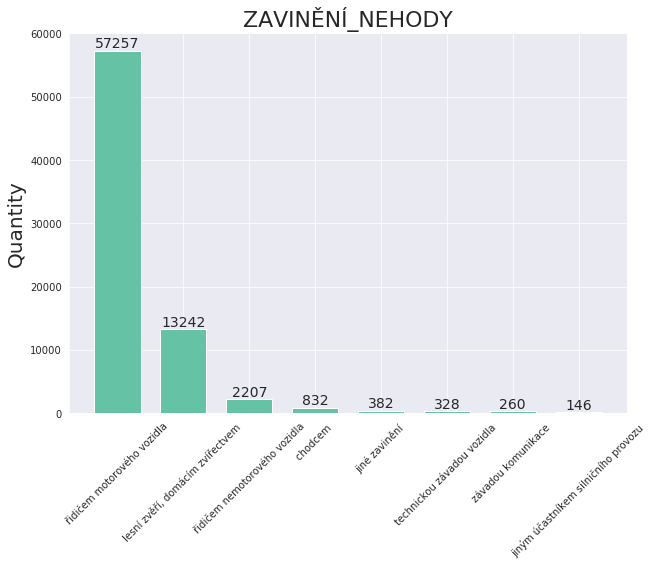

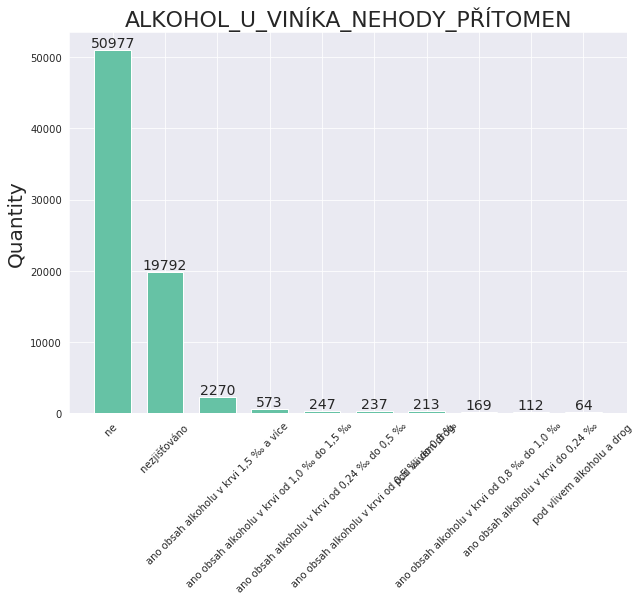

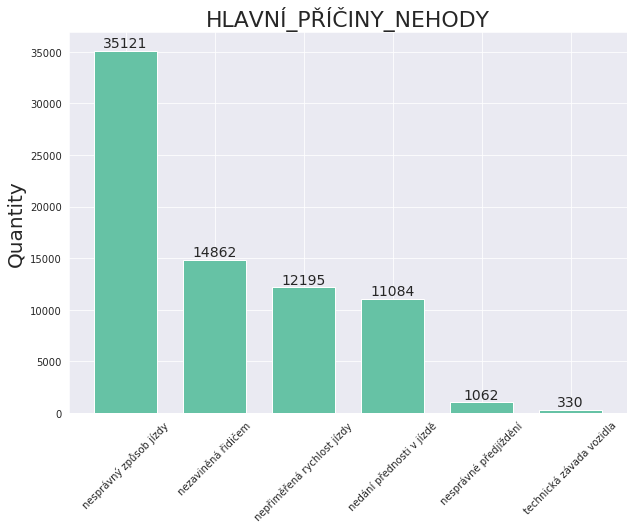

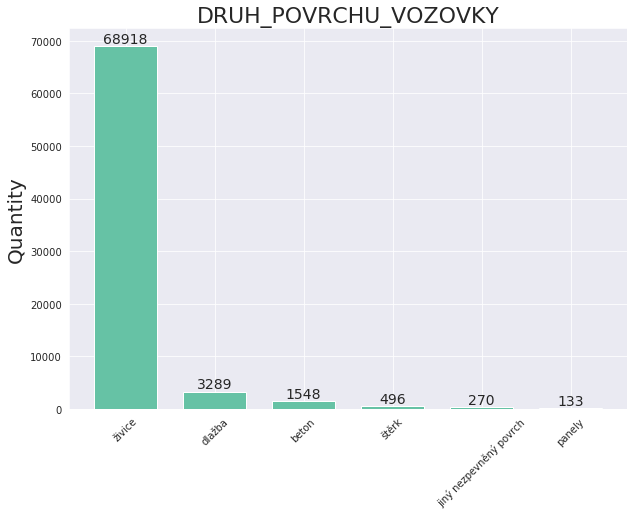

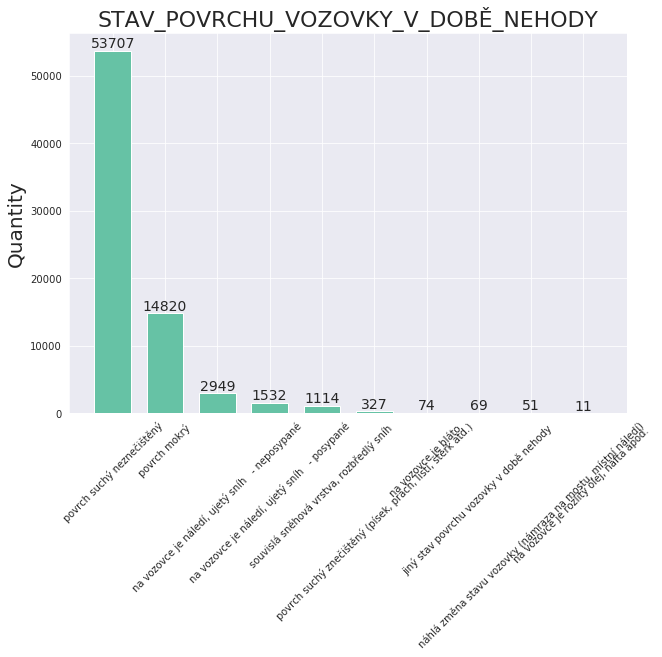

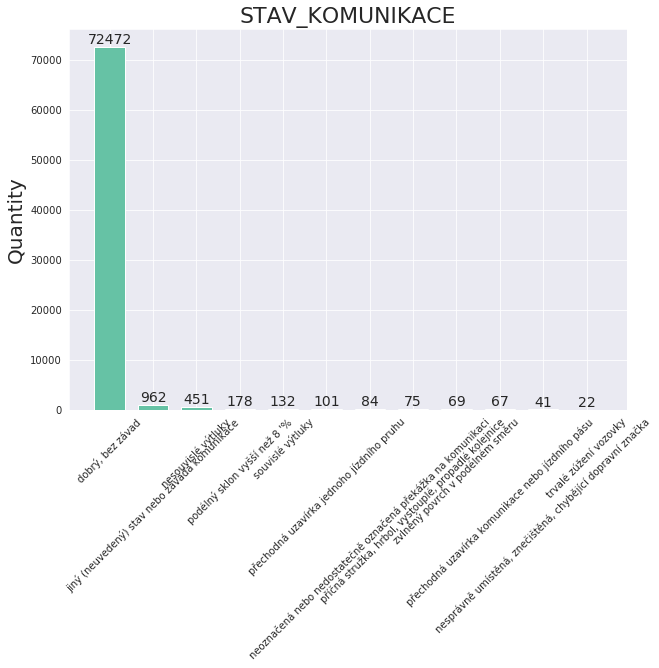

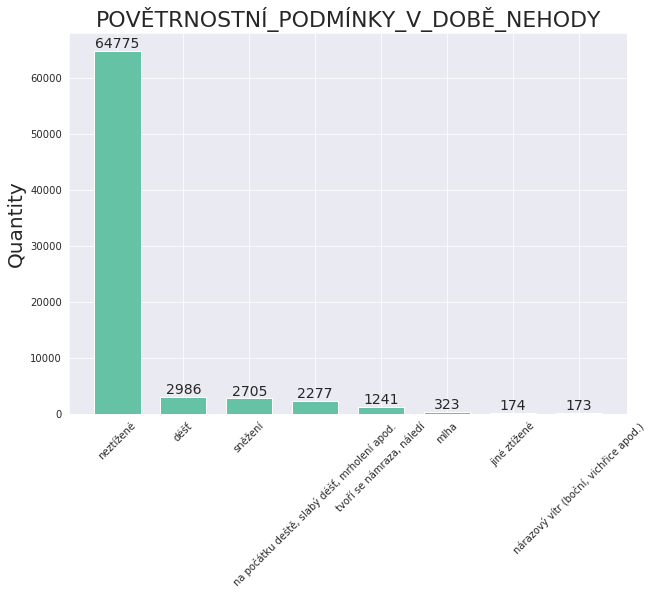

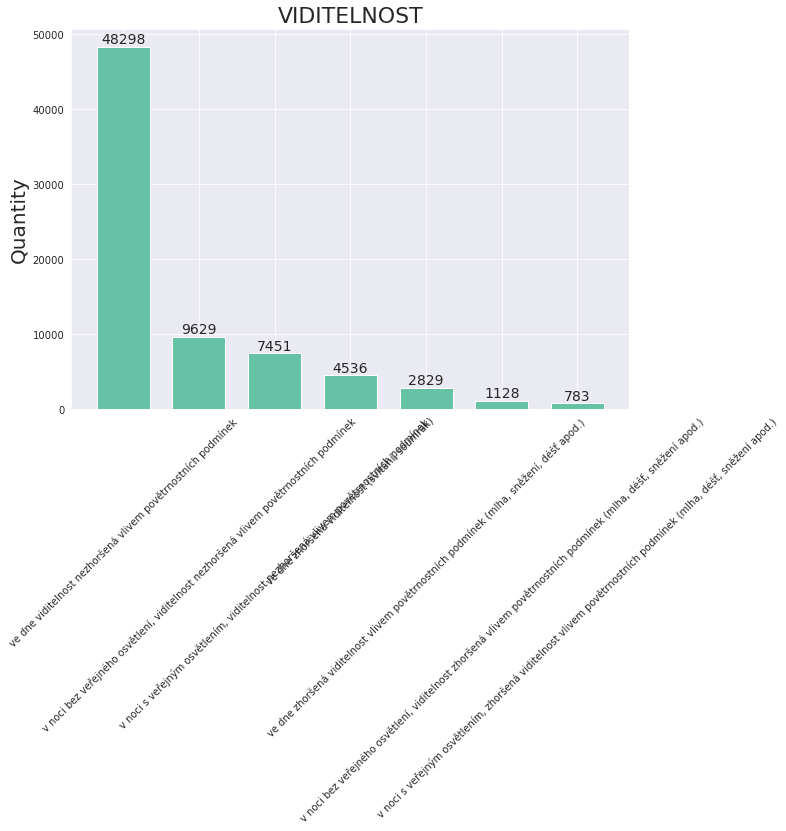

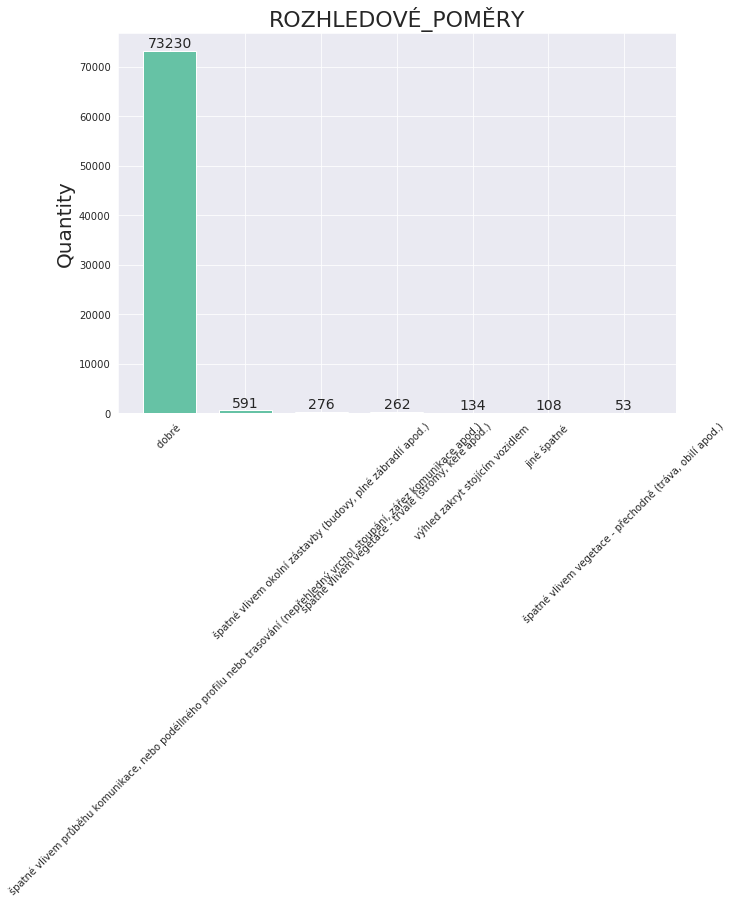

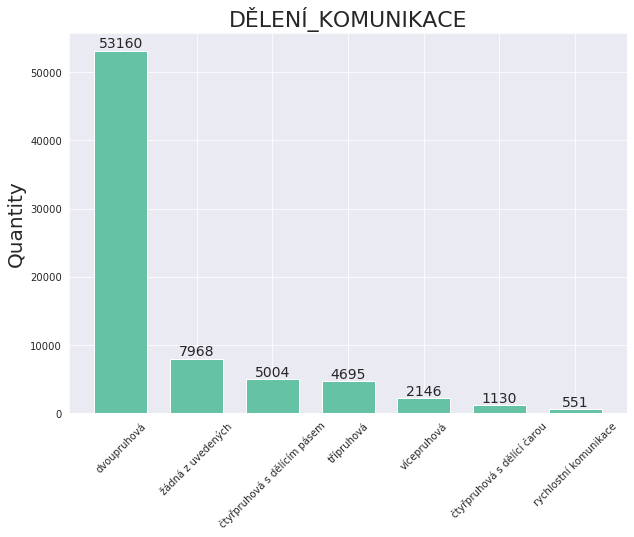

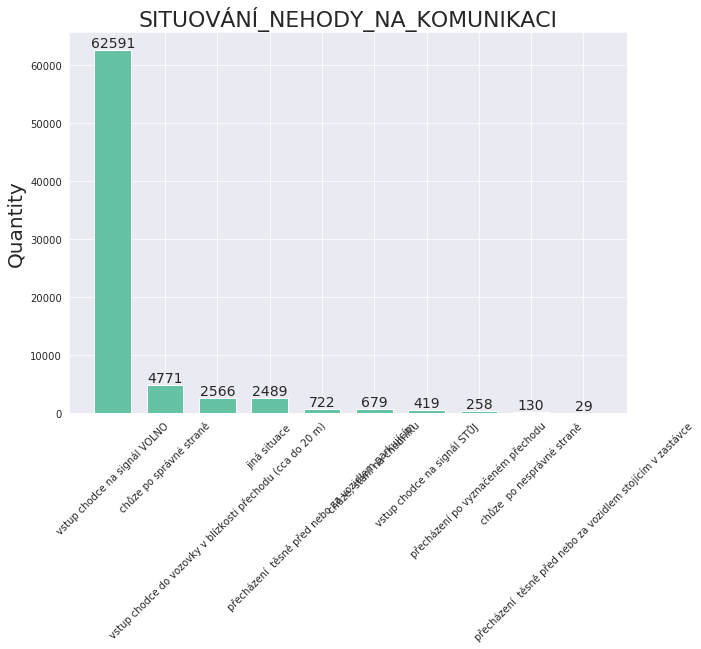

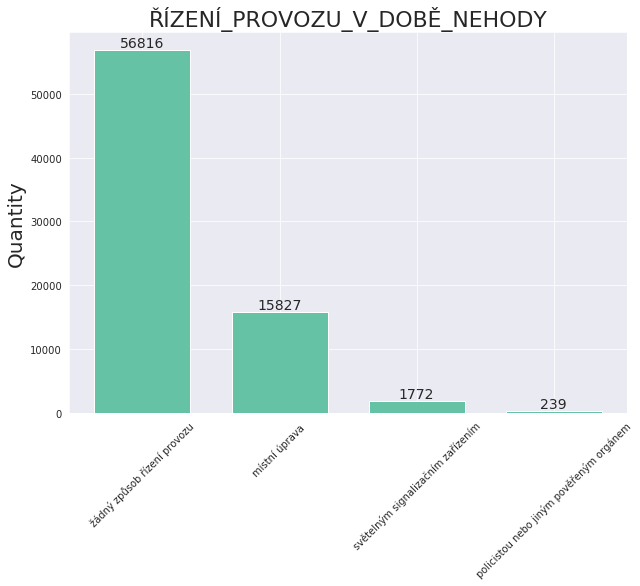

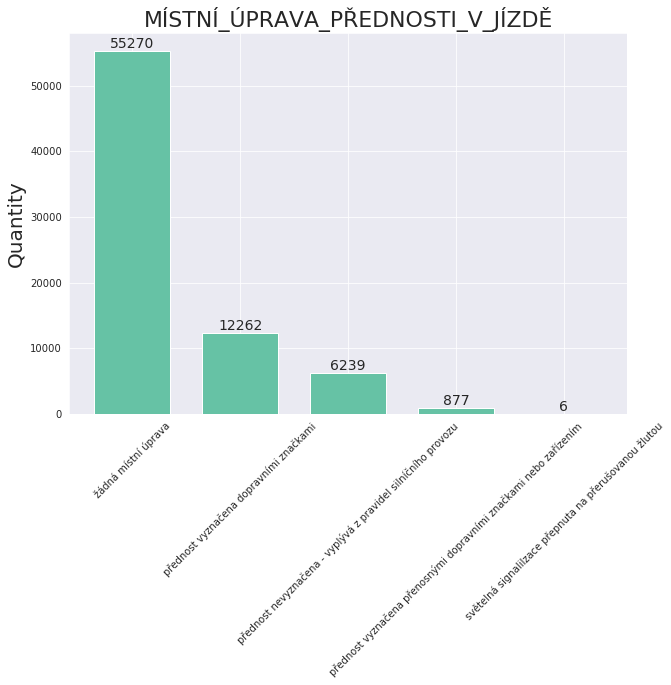

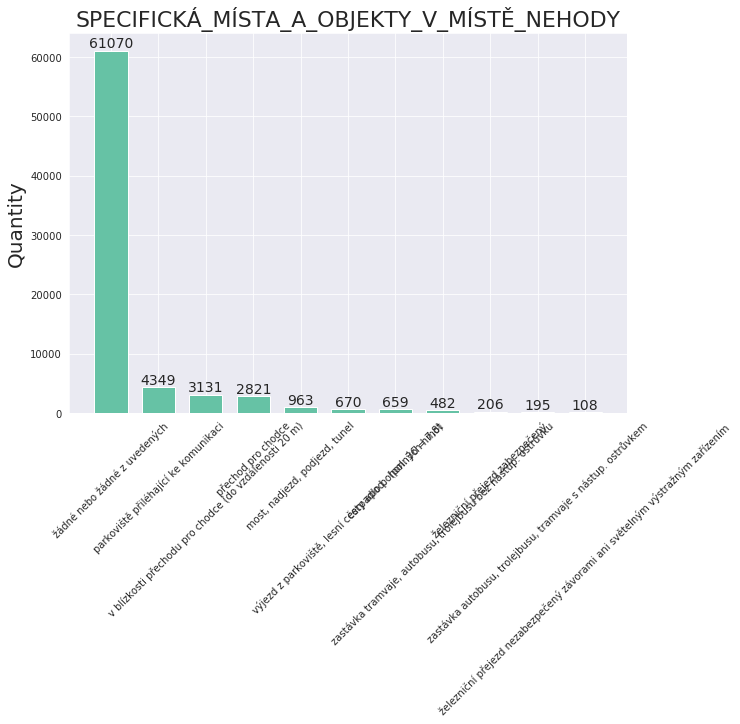

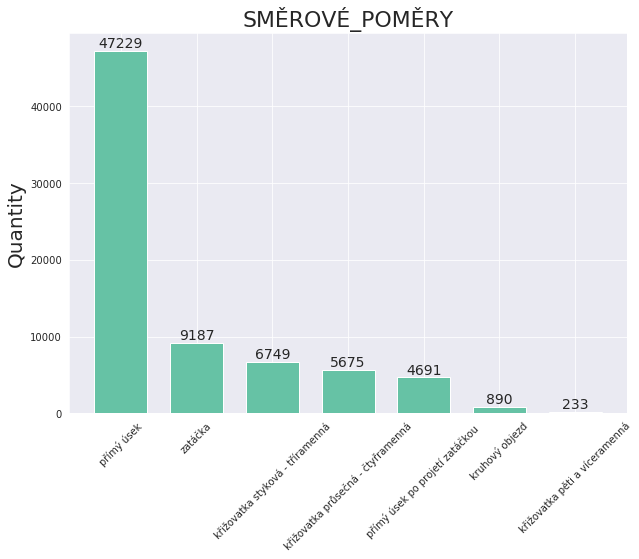

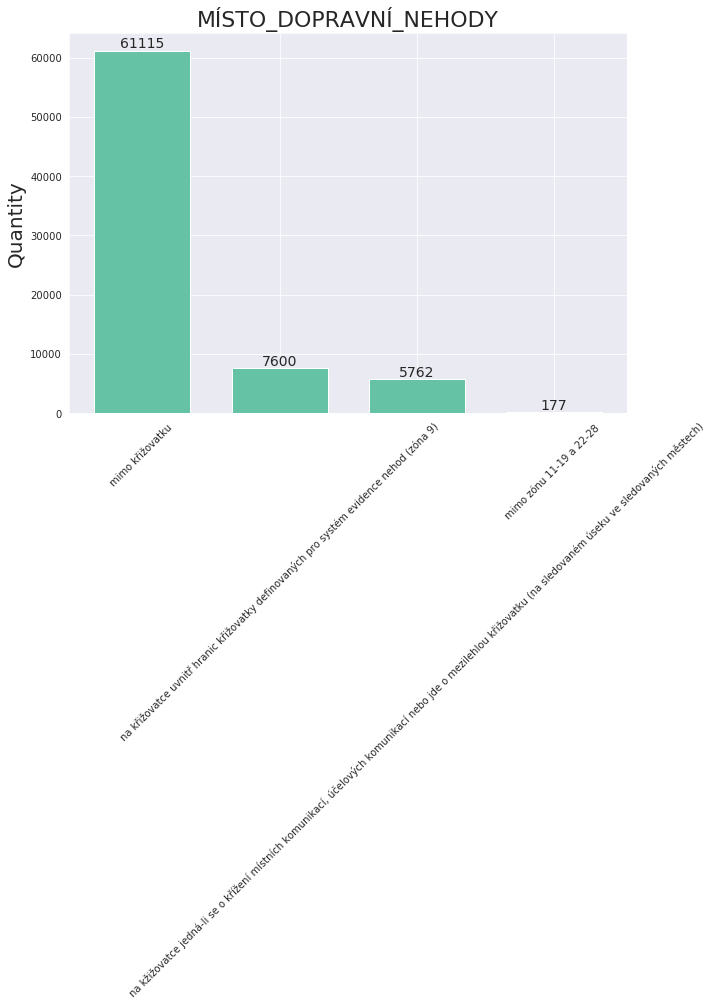

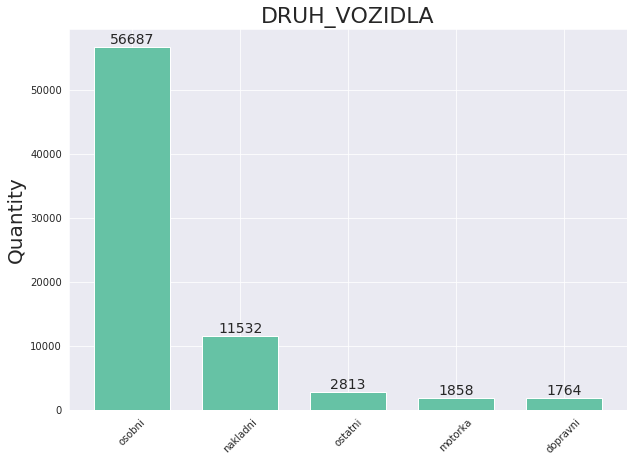

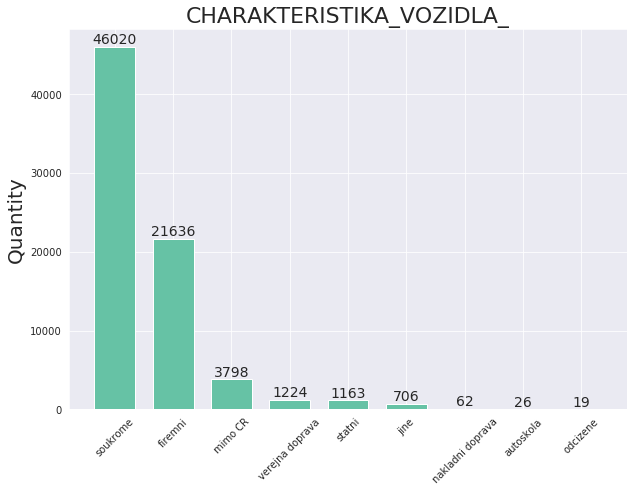

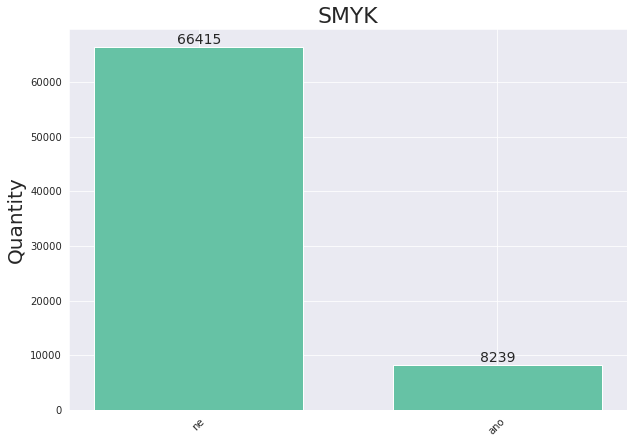

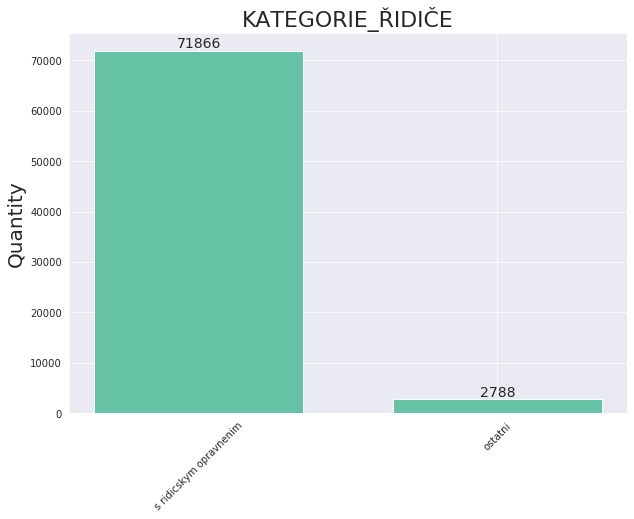

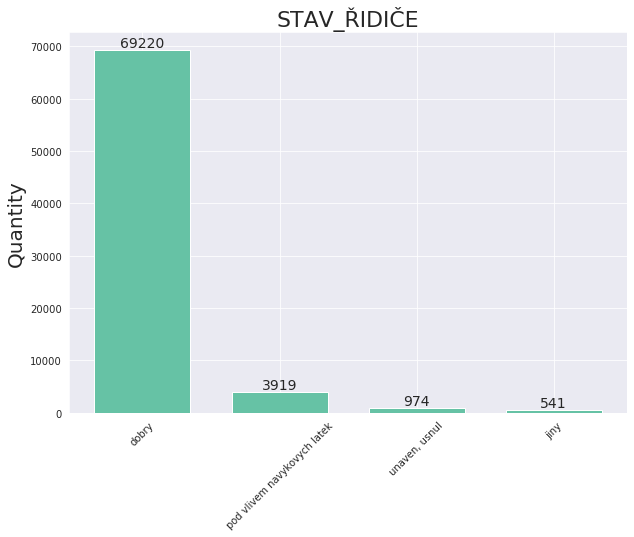

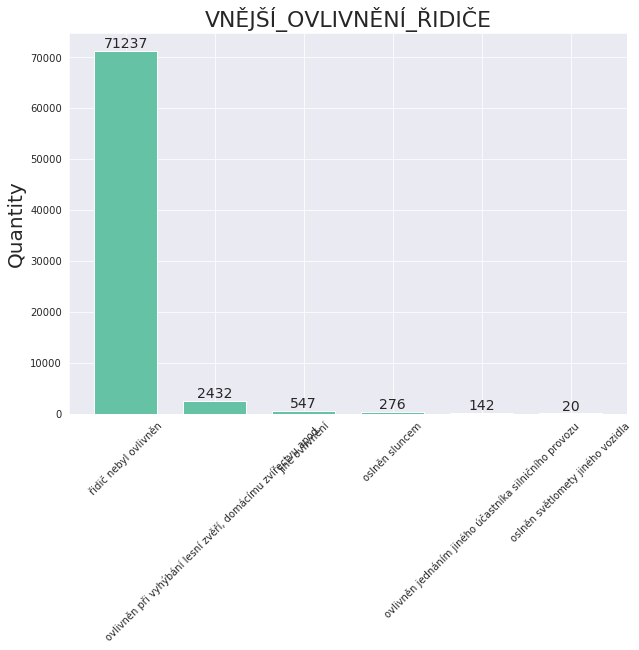

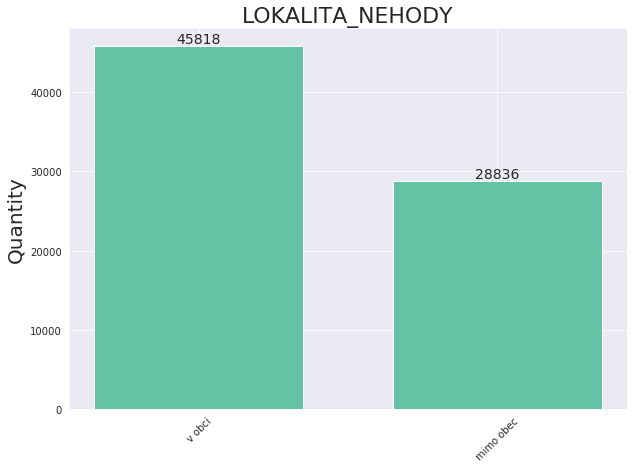

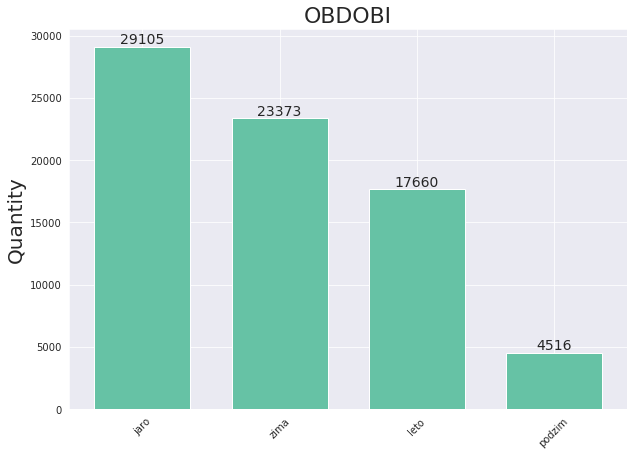

In [15]:
# generate bar chart for every categorical feature
for c in categoricalFeatures:
    colValues = pandasData[c].value_counts() #counts of every distinct value in a column
    colValues_height = colValues.values.tolist() #Provides numerical values
    colValues_labels = colValues.axes[0].tolist() #Converts index labels object to list
    
    ind = np.arange(colValues.count())  # the x locations for the groups
    width = 0.7 #width of the bar
    
    fig, ax = plt.subplots(figsize=(10,7)) #size of the chart
    chart = ax.bar(ind, colValues_height , width) #construct for the chart

    #Add some text for labels, title and axes ticks
    ax.set_ylabel('Quantity',fontsize=20)
    ax.set_title(c,fontsize=22)
    ax.set_xticks(ind) #Positioning on the x axis
    ax.set_xticklabels(colValues_labels)
    plt.xticks(rotation=45)
    
    autolabel(chart)   
    plt.show()

## 1.1 Correlation

In [16]:
corrMatrix = pandasData.corr()

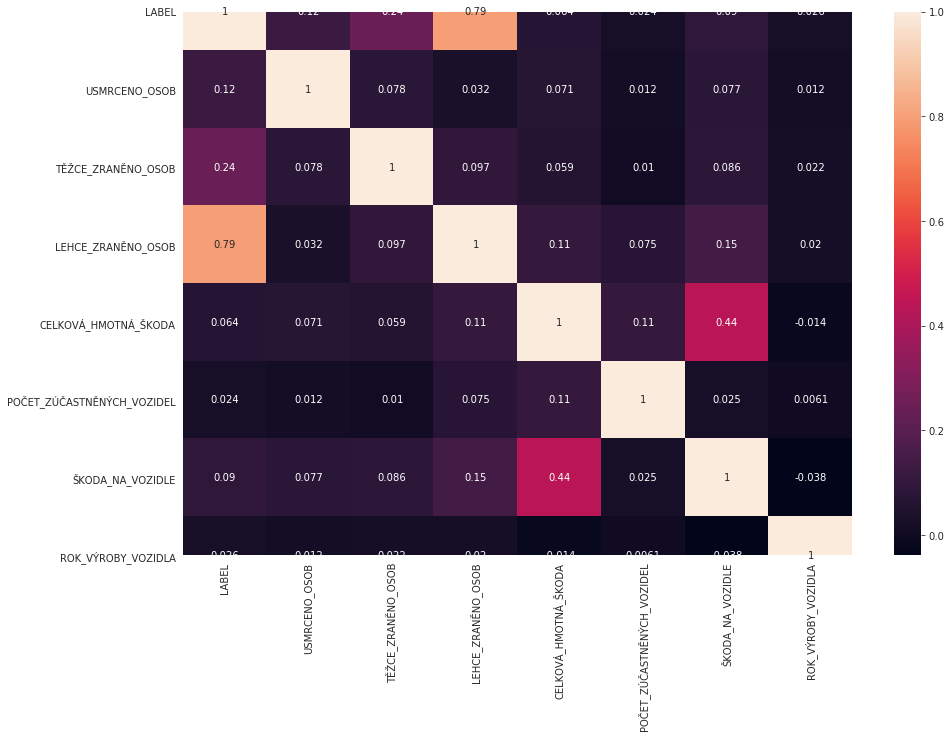

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True, ax=ax)

## 1.2 Bucketing

### This is only bucket testing

In [18]:
from pyspark.ml.feature import Bucketizer

bucketBorders = [-float("inf"), 0, 300, float("inf")]

bucketNames = []
for x in range(len(bucketBorders)-1):
    bucketNames.append('{} --> {}'.format(str(bucketBorders[x]), str(bucketBorders[x+1])))

bucketer = (Bucketizer()
            .setSplits(bucketBorders)
            .setInputCol("ŠKODA_NA_VOZIDLE")
            .setOutputCol("ŠKODA_NA_VOZIDLE_bucket"))

bucketerOutput = (
bucketer
  .transform(cleanData)
  .select("ŠKODA_NA_VOZIDLE", "ŠKODA_NA_VOZIDLE_bucket")
  .toPandas()
)

[]

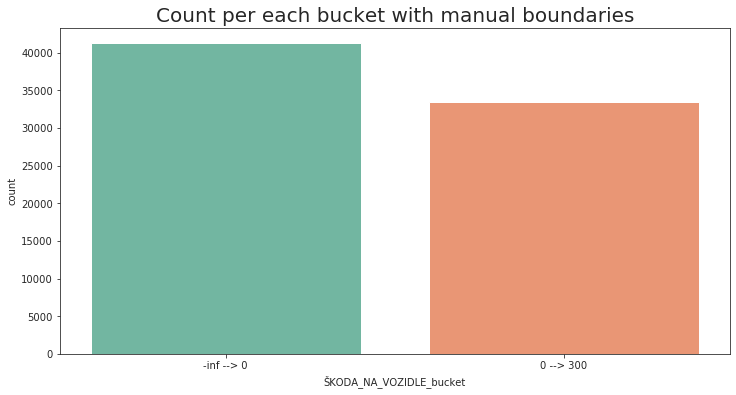

In [19]:
plt.figure(figsize=(12,6))
sns.set_style("ticks")
ax = sns.countplot(x = "ŠKODA_NA_VOZIDLE_bucket", data=bucketerOutput, palette="{}".format(pltt))
ax.set_xticklabels(bucketNames)
ax.set_title('Count per each bucket with manual boundaries', fontSize=20)
ax.plot()